In [1]:
!git clone https://github.com/sameerkhan7/Robot_Tool_Segmentation.git
%cd Robot_Tool_Segmentation


fatal: destination path 'Robot_Tool_Segmentation' already exists and is not an empty directory.
/content/Robot_Tool_Segmentation


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pwd

/content/Robot_Tool_Segmentation


# Downloading the data ONCE

In [4]:
# # Downloading
# !cp /content/drive/MyDrive/data.zip /content/Robot_Tool_Segmentation/


In [5]:
%cd /content/Robot_Tool_Segmentation/
# !unzip data.zip -d data

/content/Robot_Tool_Segmentation


In [6]:
#%cd /content/Robot_Tool_Segmentation
# Remove the 'data' folder and its contents
# !rm -rf data


In [7]:
# Libraries
!ls
!pwd

BAAnet.ipynb  data		EndovisDataloader.py  __pycache__      TrainingUtils.py
BAAnet.py     DecoderModule.py	LICENSE		      README.md
BBAModule.py  EncoderModule.py	model.pth	      Test_MLDL.ipynb
/content/Robot_Tool_Segmentation


In [8]:
import torch
import random
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
import EndovisDataloader
import BBAModule
import EncoderModule
import TrainingUtils
import BAAnet
import DecoderModule


In [9]:
# set seed for reprodicibility
def set_seed(seed):
    random.seed(seed)  # Python random seed
    np.random.seed(seed)  # NumPy random seed
    torch.manual_seed(seed)  # PyTorch random seed for CPU
    torch.cuda.manual_seed(seed)  # PyTorch random seed for GPU
    torch.cuda.manual_seed_all(seed)  # PyTorch random seed for all GPUs
    # Ensure deterministic behavior in CUDA
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

In [10]:
%cd /content/Robot_Tool_Segmentation/data/
!pwd


/content/Robot_Tool_Segmentation/data
/content/Robot_Tool_Segmentation/data


In [11]:
import os

In [12]:
os.getcwd()

'/content/Robot_Tool_Segmentation/data'

In [13]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [14]:
# get dataloaders and display test images
seed = 42
batch_size = 64
reduce_factor = 4 # how much to reduce image size by before training
num_workers = 0 # 0 for notebooks
train_dataloader, val_dataloader, test_dataloader = EndovisDataloader.getDataloaders(batch_size, reduce_factor, num_workers,seed)


--Data Information--
Actual Image Size: (1280, 1024)
Reduced Image Size: (320, 256)
Training Set Size: 1639
Validation Set Size: 596
Test Set Size: 997


## Setting Hyperparameters

In [15]:
# model and hyperparameters
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
epochs = 50
lr = 1e-4
set_seed(seed) # set random seed
#model = BAAnet.BAANet_BBA_Only().to(device)
#model = BAAnet.BAANet().to(device)
model = BAAnet.BAANet_BAF_Only().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr) # Adam optimizer
criterion = TrainingUtils.DICELoss # loss function
#criterion = torch.nn.CrossEntropyLoss()
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.5) # learning rate scheduler

cuda:0


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


## Training

In [16]:
# train model. Output is [epoch, training_loss, mdice, miou, mdice_robot, miou_robot]
training_outputs = []

for i in range(epochs):
    training_output = TrainingUtils.train(train_dataloader, val_dataloader, model, criterion, optimizer, scheduler, i, device)
    training_outputs.append(training_output)

0it [00:00, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:240: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)
26it [02:52,  6.63s/it]
10it [11:15, 67.58s/it]


Epoch 0: Training Loss = 0.9576058439774991, mDICE: 0.5565833352179105, mIoU: 0.5440079002128616 mDICE Robot: 0.0012991538555537354, mIoU Robot: 0.0006519599301690275


26it [02:47,  6.44s/it]


Epoch 1: Training Loss = 0.955902881468869, mDICE: 0, mIoU: 0 mDICE Robot: 0, mIoU Robot: 0


26it [02:47,  6.43s/it]


Epoch 2: Training Loss = 0.9535451699802222, mDICE: 0, mIoU: 0 mDICE Robot: 0, mIoU Robot: 0


26it [02:46,  6.39s/it]


Epoch 3: Training Loss = 0.9502184831605447, mDICE: 0, mIoU: 0 mDICE Robot: 0, mIoU Robot: 0


26it [02:47,  6.43s/it]


Epoch 4: Training Loss = 0.9487344071000794, mDICE: 0, mIoU: 0 mDICE Robot: 0, mIoU Robot: 0


26it [02:45,  6.37s/it]
10it [11:09, 67.00s/it]


Epoch 5: Training Loss = 0.9478452526476786, mDICE: 0.5626935485716197, mIoU: 0.5465686473526955 mDICE Robot: 0.03437500000000057, mIoU Robot: 0.03437500000000057


26it [02:43,  6.30s/it]


Epoch 6: Training Loss = 0.9471510081947483, mDICE: 0, mIoU: 0 mDICE Robot: 0, mIoU Robot: 0


26it [02:44,  6.31s/it]


Epoch 7: Training Loss = 0.9466641150933152, mDICE: 0, mIoU: 0 mDICE Robot: 0, mIoU Robot: 0


26it [02:43,  6.30s/it]


Epoch 8: Training Loss = 0.9461068414348475, mDICE: 0, mIoU: 0 mDICE Robot: 0, mIoU Robot: 0


26it [02:43,  6.29s/it]


Epoch 9: Training Loss = 0.9456190220358571, mDICE: 0, mIoU: 0 mDICE Robot: 0, mIoU Robot: 0


26it [02:44,  6.31s/it]
10it [11:05, 66.57s/it]


Epoch 10: Training Loss = 0.9452766100238184, mDICE: 0.538032432960863, mIoU: 0.5213960987869827 mDICE Robot: 0.03437500000000057, mIoU Robot: 0.03437500000000057


26it [02:44,  6.31s/it]


Epoch 11: Training Loss = 0.9449150621887697, mDICE: 0, mIoU: 0 mDICE Robot: 0, mIoU Robot: 0


26it [02:43,  6.29s/it]


Epoch 12: Training Loss = 0.9445813443814924, mDICE: 0, mIoU: 0 mDICE Robot: 0, mIoU Robot: 0


26it [02:43,  6.30s/it]


Epoch 13: Training Loss = 0.9441876260593621, mDICE: 0, mIoU: 0 mDICE Robot: 0, mIoU Robot: 0


26it [02:44,  6.33s/it]


Epoch 14: Training Loss = 0.9438759597360241, mDICE: 0, mIoU: 0 mDICE Robot: 0, mIoU Robot: 0


26it [02:43,  6.29s/it]
10it [11:05, 66.57s/it]


Epoch 15: Training Loss = 0.9435304616435339, mDICE: 0.5137860349258742, mIoU: 0.4963826985432519 mDICE Robot: 0.03437500000000057, mIoU Robot: 0.03437500000000057


26it [02:43,  6.30s/it]


Epoch 16: Training Loss = 0.9431805113035545, mDICE: 0, mIoU: 0 mDICE Robot: 0, mIoU Robot: 0


26it [02:43,  6.30s/it]


Epoch 17: Training Loss = 0.9428185089489965, mDICE: 0, mIoU: 0 mDICE Robot: 0, mIoU Robot: 0


26it [02:42,  6.27s/it]


Epoch 18: Training Loss = 0.942445891710572, mDICE: 0, mIoU: 0 mDICE Robot: 0, mIoU Robot: 0


26it [02:44,  6.31s/it]


Epoch 19: Training Loss = 0.94194619458236, mDICE: 0, mIoU: 0 mDICE Robot: 0, mIoU Robot: 0


26it [02:44,  6.34s/it]
10it [11:05, 66.56s/it]


Epoch 20: Training Loss = 0.9414739536014989, mDICE: 0.5078729154446155, mIoU: 0.4901620536530599 mDICE Robot: 0.03437500000000057, mIoU Robot: 0.03437500000000057


26it [02:44,  6.32s/it]


Epoch 21: Training Loss = 0.9410285070070967, mDICE: 0, mIoU: 0 mDICE Robot: 0, mIoU Robot: 0


26it [02:44,  6.32s/it]


Epoch 22: Training Loss = 0.9406398582815138, mDICE: 0, mIoU: 0 mDICE Robot: 0, mIoU Robot: 0


26it [02:43,  6.28s/it]


Epoch 23: Training Loss = 0.9402054736582497, mDICE: 0, mIoU: 0 mDICE Robot: 0, mIoU Robot: 0


26it [02:44,  6.33s/it]


Epoch 24: Training Loss = 0.9399090717983013, mDICE: 0, mIoU: 0 mDICE Robot: 0, mIoU Robot: 0


26it [02:43,  6.28s/it]
10it [11:04, 66.44s/it]


Epoch 25: Training Loss = 0.9394986825364712, mDICE: 0.507908048120732, mIoU: 0.4899531821778571 mDICE Robot: 0.03437500000000057, mIoU Robot: 0.03437500000000057


26it [02:43,  6.31s/it]


Epoch 26: Training Loss = 0.9392436380718979, mDICE: 0, mIoU: 0 mDICE Robot: 0, mIoU Robot: 0


26it [02:42,  6.27s/it]


Epoch 27: Training Loss = 0.9389974581779044, mDICE: 0, mIoU: 0 mDICE Robot: 0, mIoU Robot: 0


26it [02:43,  6.30s/it]


Epoch 28: Training Loss = 0.9387524146408862, mDICE: 0, mIoU: 0 mDICE Robot: 0, mIoU Robot: 0


26it [02:44,  6.32s/it]


Epoch 29: Training Loss = 0.9384676389846096, mDICE: 0, mIoU: 0 mDICE Robot: 0, mIoU Robot: 0


26it [02:43,  6.28s/it]
10it [11:06, 66.63s/it]


Epoch 30: Training Loss = 0.9382006623880568, mDICE: 0.5105613551724124, mIoU: 0.4923460599597629 mDICE Robot: 0.034389818307038765, mIoU Robot: 0.03438241855609015


26it [02:43,  6.30s/it]


Epoch 31: Training Loss = 0.9380309797035555, mDICE: 0, mIoU: 0 mDICE Robot: 0, mIoU Robot: 0


26it [02:44,  6.34s/it]


Epoch 32: Training Loss = 0.9378792668305655, mDICE: 0, mIoU: 0 mDICE Robot: 0, mIoU Robot: 0


26it [02:44,  6.31s/it]


Epoch 33: Training Loss = 0.9375999234899458, mDICE: 0, mIoU: 0 mDICE Robot: 0, mIoU Robot: 0


26it [02:44,  6.34s/it]


Epoch 34: Training Loss = 0.9373855410850626, mDICE: 0, mIoU: 0 mDICE Robot: 0, mIoU Robot: 0


26it [02:44,  6.32s/it]
10it [11:05, 66.50s/it]


Epoch 35: Training Loss = 0.937235035217128, mDICE: 0.5141085325251802, mIoU: 0.4949392428445289 mDICE Robot: 0.03326973888526757, mIoU Robot: 0.03304385398270001


26it [02:43,  6.29s/it]


Epoch 36: Training Loss = 0.9370941920173562, mDICE: 0, mIoU: 0 mDICE Robot: 0, mIoU Robot: 0


26it [02:44,  6.31s/it]


Epoch 37: Training Loss = 0.9370057753967258, mDICE: 0, mIoU: 0 mDICE Robot: 0, mIoU Robot: 0


26it [02:44,  6.33s/it]


Epoch 38: Training Loss = 0.9367939722573412, mDICE: 0, mIoU: 0 mDICE Robot: 0, mIoU Robot: 0


26it [02:43,  6.31s/it]


Epoch 39: Training Loss = 0.936590282178407, mDICE: 0, mIoU: 0 mDICE Robot: 0, mIoU Robot: 0


26it [02:43,  6.27s/it]
10it [11:05, 66.53s/it]


Epoch 40: Training Loss = 0.9364720416943246, mDICE: 0.49743395196952944, mIoU: 0.4787628964433672 mDICE Robot: 0.031016458946125054, mIoU Robot: 0.030364530064953328


26it [02:43,  6.30s/it]


Epoch 41: Training Loss = 0.9363188707864831, mDICE: 0, mIoU: 0 mDICE Robot: 0, mIoU Robot: 0


26it [02:43,  6.29s/it]


Epoch 42: Training Loss = 0.9361894785022583, mDICE: 0, mIoU: 0 mDICE Robot: 0, mIoU Robot: 0


26it [02:43,  6.29s/it]


Epoch 43: Training Loss = 0.9360671742692964, mDICE: 0, mIoU: 0 mDICE Robot: 0, mIoU Robot: 0


26it [02:43,  6.31s/it]


Epoch 44: Training Loss = 0.9358996362674659, mDICE: 0, mIoU: 0 mDICE Robot: 0, mIoU Robot: 0


26it [02:44,  6.32s/it]
10it [11:06, 66.67s/it]


Epoch 45: Training Loss = 0.9358048636770634, mDICE: 0.49167015835235883, mIoU: 0.47212251042209674 mDICE Robot: 0.0317936929144622, mIoU Robot: 0.030767287950858757


26it [02:43,  6.29s/it]


Epoch 46: Training Loss = 0.9356202916196108, mDICE: 0, mIoU: 0 mDICE Robot: 0, mIoU Robot: 0


26it [02:43,  6.30s/it]


Epoch 47: Training Loss = 0.9354847466392157, mDICE: 0, mIoU: 0 mDICE Robot: 0, mIoU Robot: 0


26it [02:44,  6.32s/it]


Epoch 48: Training Loss = 0.9354906239461069, mDICE: 0, mIoU: 0 mDICE Robot: 0, mIoU Robot: 0


26it [02:44,  6.31s/it]

Epoch 49: Training Loss = 0.935362471921477, mDICE: 0, mIoU: 0 mDICE Robot: 0, mIoU Robot: 0


In [17]:
# save trained model
torch.save(model.state_dict(), "model1.pth")

## Results and Plots

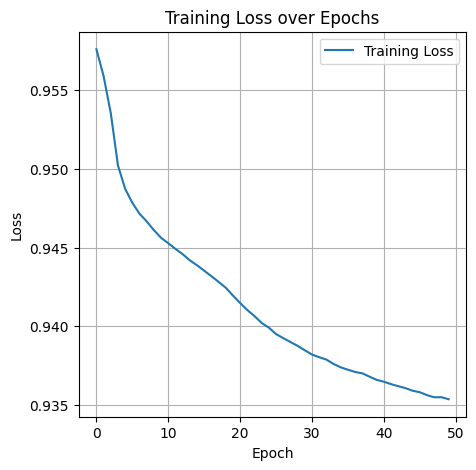

[[0.00000000e+00 9.57605844e-01 5.56583335e-01 5.44007900e-01
  1.29915386e-03 6.51959930e-04]
 [5.00000000e+00 9.47845253e-01 5.62693549e-01 5.46568647e-01
  3.43750000e-02 3.43750000e-02]
 [1.00000000e+01 9.45276610e-01 5.38032433e-01 5.21396099e-01
  3.43750000e-02 3.43750000e-02]
 [1.50000000e+01 9.43530462e-01 5.13786035e-01 4.96382699e-01
  3.43750000e-02 3.43750000e-02]
 [2.00000000e+01 9.41473954e-01 5.07872915e-01 4.90162054e-01
  3.43750000e-02 3.43750000e-02]
 [2.50000000e+01 9.39498683e-01 5.07908048e-01 4.89953182e-01
  3.43750000e-02 3.43750000e-02]
 [3.00000000e+01 9.38200662e-01 5.10561355e-01 4.92346060e-01
  3.43898183e-02 3.43824186e-02]
 [3.50000000e+01 9.37235035e-01 5.14108533e-01 4.94939243e-01
  3.32697389e-02 3.30438540e-02]
 [4.00000000e+01 9.36472042e-01 4.97433952e-01 4.78762896e-01
  3.10164589e-02 3.03645301e-02]
 [4.50000000e+01 9.35804864e-01 4.91670158e-01 4.72122510e-01
  3.17936929e-02 3.07672880e-02]]


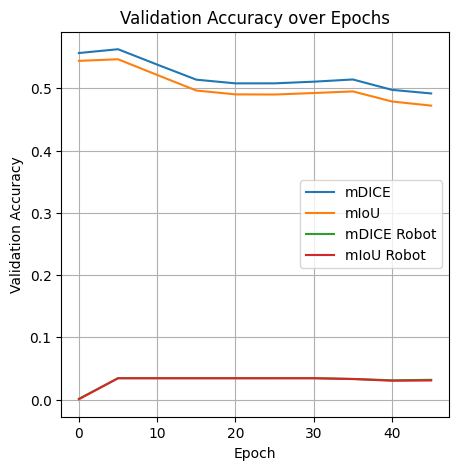

In [18]:
# process outputs
training_outputs_cpu = []
for i in training_outputs:
    temp = []
    for j in i:
        if torch.is_tensor(j):
            temp.append(j.cpu())
        else:
            temp.append(j)
    training_outputs_cpu.append(temp)

training_outputs_cpu = np.array(training_outputs_cpu)

#print training loss
plt.figure(figsize=(5, 5))
plt.plot(training_outputs_cpu[:,0], training_outputs_cpu[:,1], label='Training Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

#print validation scores
training_outputs_cpu_filtered = [value for index, value in enumerate(training_outputs_cpu) if index % 5 == 0]
training_outputs_cpu_filtered = np.array(training_outputs_cpu_filtered)
print(training_outputs_cpu_filtered)
plt.figure(figsize=(5, 5))
plt.plot(training_outputs_cpu_filtered[:,0], training_outputs_cpu_filtered[:,2], label='mDICE')
plt.plot(training_outputs_cpu_filtered[:,0], training_outputs_cpu_filtered[:,3], label='mIoU')
plt.plot(training_outputs_cpu_filtered[:,0], training_outputs_cpu_filtered[:,4], label='mDICE Robot')
plt.plot(training_outputs_cpu_filtered[:,0], training_outputs_cpu_filtered[:,5], label='mIoU Robot')
plt.title('Validation Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

In [19]:
# Test Model on Test Data
# test model
m_dice, m_iou, mdice_robot, miou_robot = TrainingUtils.test(model, test_dataloader, device)
print(f"Mean DICE Score: {m_dice}")
print(f"Mean IoU Score: {m_iou}")
print(f"Mean DICE Robot Score: {mdice_robot}")
print(f"Mean IoU Robot Score: {miou_robot}")

13it [41:14, 190.35s/it]


KeyboardInterrupt: 

In [ ]:
def get_ith_sample(dataloader, i):

    batch_size = dataloader.batch_size
    batch_idx = i // batch_size
    sample_idx = i % batch_size

    for current_batch_idx, (images, labels) in enumerate(dataloader):
        if current_batch_idx == batch_idx:
            # Return the i-th sample from the batch
            return images[sample_idx], labels[sample_idx]

# display model outputs
model.cpu()
#i = 1 # 0 to batch_size
# pick 3 "random" images to compare models on
imgs, labels = [], []
img1, lab1 = get_ith_sample(val_dataloader, 198)
img2, lab2 = get_ith_sample(val_dataloader, 271)
img3, lab3 = get_ith_sample(test_dataloader, 159)
imgs = [img1, img2, img3]
labels = [lab1, lab2, lab3]
results = []

for i in range(3):
    input, label = imgs[i].unsqueeze(0), labels[i].unsqueeze(0)

    predict = model(input) # predict image
    predict = torch.argmax(predict, dim=1) # get grayscale prediction
    predict = torch.eye(12, device=predict.device)[predict].permute(0,3,1,2)
    predict = torch.nn.functional.interpolate(predict.float(), size=label.shape[2:], mode="nearest-exact")  # match label size
    prediction = EndovisDataloader.convert_masks_to_gray(predict.squeeze(0))

    label = EndovisDataloader.convert_masks_to_gray(label.squeeze(0))

    cmap = plt.get_cmap('Paired',12)
    cbar_ticks = [0,1,2,3,4,5,6,7,8,9,10,11]
    cbar_labels = ["Background Tissue", "Instrument Shaft", "Instrument Clasper", "Instrument Wrist", "Kidney Parenchyma", "Covered Kidney",
                "Thread", "Clamps", "Suturing Needle", "Suction Instrument", "Small Intestine", "Ultrasound Probe"]

    # un-normalize input
    mean = torch.tensor([0.464, 0.341, 0.363]).view(-1, 1, 1)
    std = torch.tensor([0.210, 0.194, 0.204]).view(-1, 1, 1)
    input = input.squeeze(0) * std + mean

    results.append((input,label,prediction))


fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i in range(3):
    axes[i,0].imshow(results[i][0].permute(1, 2, 0))
    axes[i,1].imshow(results[i][1], cmap = cmap, vmin = 0, vmax = 11)
    im = axes[i,2].imshow(results[i][2], cmap = cmap, vmin = 0, vmax = 11)

    cbar = fig.colorbar(im, ax=axes[i,2], fraction=0.046, pad=0.04)
    cbar.set_label("Segmentation Labels", fontsize=10)
    cbar.set_ticks(cbar_ticks)
    cbar.set_ticklabels(cbar_labels)


plt.tight_layout()
plt.show()

# things to record: epochs, batch_size, reduce_factor, training loss curve, training time, validation score curves, test scores, test time, example image (below)